In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


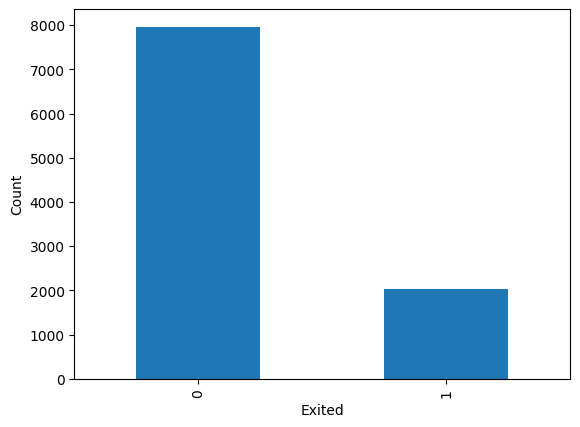

In [4]:
plt.xlabel('Exited')
plt.ylabel('Count')
df['Exited'].value_counts().plot.bar()
plt.show()

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df = pd.concat([df,pd.get_dummies(df['Geography'],prefix='Geo')],axis=1)

In [7]:
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geo_France       10000 non-null  uint8  
 15  Geo_Germany      10000 non-null  uint8  
 16  Geo_Spain        10000 non-null  uint8  
 17  Female       

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [11]:
y = df['Exited'].values
x = df.loc[:,df.columns != 'Exited'].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.25)

In [13]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [14]:
x_train.shape

(7500, 13)

In [15]:
from tensorflow.keras.layers import Dense,Conv1D,Flatten
from tensorflow.keras.models import Sequential, Model

model=Sequential()
model.add(Flatten(input_shape=(13,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='BinaryCrossentropy')

In [17]:
model.fit(x_train,y_train,batch_size=64,validation_split=0.1,epochs=100)

Epoch 1/100
106/106 [==============================] - 18s 11ms/step - loss: 0.5148 - accuracy: 0.7600 - val_loss: 0.4215 - val_accuracy: 0.8280
Epoch 2/100
106/106 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8136 - val_loss: 0.3931 - val_accuracy: 0.8360
Epoch 3/100
106/106 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8253 - val_loss: 0.3750 - val_accuracy: 0.8533
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8348 - val_loss: 0.3591 - val_accuracy: 0.8640
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8409 - val_loss: 0.3444 - val_accuracy: 0.8760
Epoch 6/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8479 - val_loss: 0.3344 - val_accuracy: 0.8693
Epoch 7/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8530 - val_loss: 0.3267 - val_accuracy: 0.87

Epoch 58/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8683 - val_loss: 0.3175 - val_accuracy: 0.8733
Epoch 59/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8683 - val_loss: 0.3163 - val_accuracy: 0.8733
Epoch 60/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8698 - val_loss: 0.3167 - val_accuracy: 0.8760
Epoch 61/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8681 - val_loss: 0.3167 - val_accuracy: 0.8733
Epoch 62/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8692 - val_loss: 0.3188 - val_accuracy: 0.8693
Epoch 63/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8674 - val_loss: 0.3140 - val_accuracy: 0.8760
Epoch 64/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8705 - val_loss: 0.3125 - val_accuracy:

In [18]:
pred = model.predict(x_test)

79/79 [==============================] - 1s 1ms/step


In [19]:
y_pred = []
for val in pred:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
accuracy_score(y_test,y_pred)

0.8668

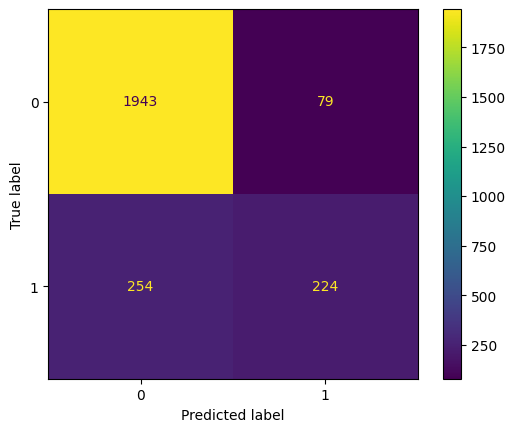

In [21]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [22]:
from sklearn.neural_network import MLPClassifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100),max_iter=300)
nn_classifier.fit(x_train,y_train)

C:\Users\Isha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100, max_iter=300)

In [23]:
y_pred2 = nn_classifier.predict(x_test)

In [24]:
accuracy_score(y_pred=y_pred2,y_true=y_test)

0.8624